In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load the time series dataset
data = pd.read_csv('../datasets/complete_data/df.csv')

# Change column names to match naming convention
data = data.rename(columns={'start MTU (UTC)': 'ds', 'Day-ahead Price [EUR/MWh] BZN|NO1': 'y'})

# Split the dataset into training and testing sets
# Split the data into training and testing sets
X = data.drop(['y', 'ds'], axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head()

,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO5,Hydro Run-of-river and poundage - BZN|NO1,Hydro Water Reservoir - BZN|NO1,Wind Onshore - BZN|NO1,Hydro Pumped Storage Aggregated- BZN|NO2,Hydro Run-of-river and poundage - BZN|NO2,Hydro Water Reservoir - BZN|NO2,...,CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO2 [MW],CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
2031,15.50,184.26000,15.50,1888.0,857.0,427.0,52.0,329.0,620.000000,4433.0,...,504.0,0.0,457.000,0.0,411.0,0.0,875.0,0.0,2.860931e+06,885000.0
6570,67.74,186.04000,67.74,1710.0,1584.0,433.0,190.0,0.0,633.781250,710.0,...,0.0,979.0,294.000,0.0,0.0,179.0,1806.0,0.0,7.387157e+06,1517000.0
6371,73.07,330.11000,295.30,1643.0,910.0,173.0,198.0,1.0,350.714286,1559.0,...,224.0,0.0,514.000,0.0,486.0,0.0,767.0,0.0,7.517500e+06,1478000.0
3490,5.63,80.06875,5.63,1692.0,1416.0,142.0,37.0,1.0,484.000000,440.0,...,88.0,0.0,358.125,0.0,359.0,0.0,887.0,0.0,3.322965e+06,1503000.0
7700,35.94,37.63000,37.63,2046.0,1721.0,845.0,129.0,0.0,790.234783,3647.0,...,0.0,279.0,354.000,0.0,1499.0,0.0,530.0,0.0,7.156747e+06,1853000.0


In [3]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training set
model.fit(X_train, y_train)

LinearRegression()

In [4]:
# Make a prediction on the testing set
predicted_values = model.predict(X_test)

# Calculate the mean absolute error (MAE) between the predicted and actual values
mae = mean_absolute_error(y_test, predicted_values)
print("Mean absolute error:            ", mae)

# Calculate the mean absolute percentage error (MAE) between the predicted and actual values
mape = mean_absolute_percentage_error(y_test, predicted_values)
print("Mean absolute percentage error: ", mape)

# Calculating the mean squared error (MSE) between the predicted and actual values
mse = mean_squared_error(y_test, predicted_values)
print("Mean squared error:             ", mse)

# Calculating the root mean squared error (RMSE) between the predicted and actual values
rmse = math.sqrt(mse)
print("Rood mean squared error:        ", rmse)


Mean absolute error:             1.7605441567484104
Mean absolute percentage error:  0.02180860632284573
Mean squared error:              24.762438848159313
Rood mean squared error:         4.976187179775225


In [5]:
# Get the absolute values of the coefficients
coefficients = np.abs(model.coef_)

# Create a dictionary of feature names and importance scores
feature_importance = dict(zip(X.columns, coefficients))

# Print the feature importance in descending order
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print("{}: {:.2f}%".format(feature, importance*100))

Day-ahead Price [EUR/MWh] BZN|NO5: 99.18%
Waste - BZN|NO2: 16.88%
Fossil Gas - BZN|NO5: 5.71%
CBF BZN|NO1 > BZN|NO3 [MW]: 2.48%
Other renewable - BZN|NO3: 1.70%
Day-ahead Price [EUR/MWh] BZN|SE3: 1.45%
Hydro Pumped Storage Aggregated- BZN|NO3: 1.09%
Day-ahead Price [EUR/MWh] BZN|NO3: 0.89%
Waste - BZN|NO5: 0.85%
Hydro Run-of-river and poundage - BZN|NO5: 0.79%
Hydro Pumped Storage Aggregated- BZN|NO2: 0.73%
Hydro Run-of-river and poundage - BZN|NO3: 0.50%
Solar - BZN|SE3: 0.43%
Wind Onshore - BZN|NO1: 0.38%
Actual Total Load [MW] - BZN|NO5: 0.32%
CBF BZN|NO1 > BZN|NO5 [MW]: 0.25%
CBF BZN|NO5 > BZN|NO1 [MW]: 0.15%
Hydro Run-of-river and poundage - BZN|NO2: 0.14%
CBF BZN|NO1 > BZN|NO2 [MW]: 0.13%
Hydro Run-of-river and poundage - BZN|NO1: 0.11%
CBF BZN|SE3 > BZN|NO1 [MW]: 0.10%
Wind Onshore - BZN|SE3: 0.08%
CBF BZN|NO1 > BZN|SE3 [MW]: 0.08%
Wind Onshore - BZN|NO2: 0.08%
Wind Onshore - BZN|NO3: 0.08%
CBF BZN|NO2 > BZN|NO1 [MW]: 0.07%
Hydro Water Reservoir - BZN|NO1: 0.06%
Nuclear - BZN|SE

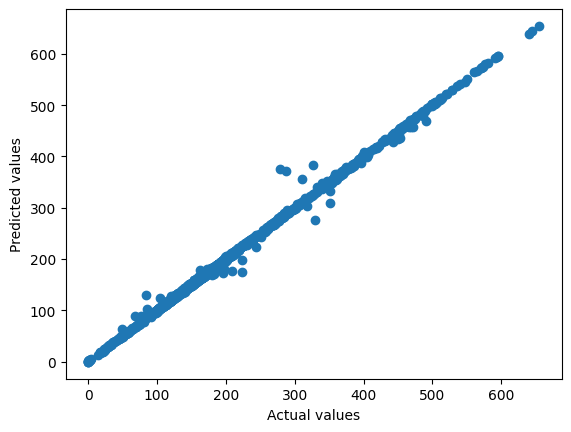

In [6]:
# Plot the predicted values against the actual values
plt.plot(y_test, predicted_values, 'o')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()